# `find_h`
Find the high of the two-phase zone in an invasion image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

The arguments and their defaults for this function are:

In [2]:
import inspect
inspect.signature(ps.metrics.find_h)

<Signature (saturation, position=None, srange=[0.01, 0.99])>

Start by performing a basic invasion simulation:

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

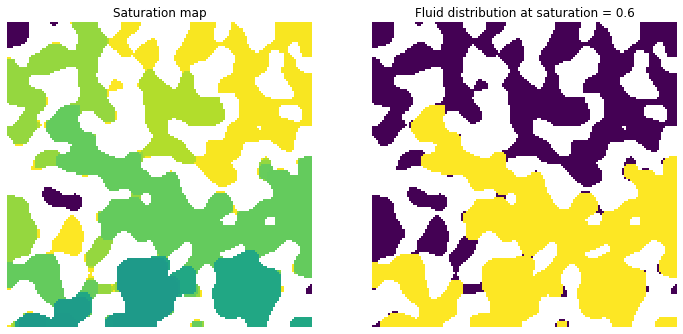

In [3]:
np.random.seed(1)
im = ps.generators.blobs(shape=[150, 150], porosity=0.6, blobiness=1)
inlets = np.zeros_like(im)
inlets[0, :] = True
inv = ps.simulations.drainage(im=im, inlets=inlets, voxel_size=1, g=0)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(inv.im_satn/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('Saturation map')
ax[1].imshow((inv.im_satn < 0.6)*(inv.im_satn > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('Fluid distribution at saturation = 0.6');

Next we need to find to convert the fluid configuration image into a saturation profile:

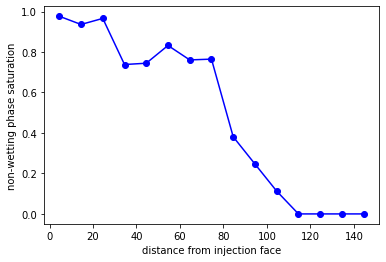

In [4]:
s = ps.metrics.satn_profile(satn=inv.im_satn, s=0.6)
plt.plot(s.position, s.saturation, 'b-o')
plt.xlabel("distance from injection face")
plt.ylabel("non-wetting phase saturation");

Finally, we can determine the height of the two phase zone:

In [5]:
h = ps.metrics.find_h(s.saturation, s.position)
print(h)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
valid                     False
zmax                      4.5
zmin                      114.5
smax                      0.9768292682926829
smin                      0.01
h                         110.0
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


## `srange`
The object that is returned by ``find_h`` is like a dataclass, meaning it is an object with data as attributes, which can be inspected by printing it.  Note that the ``valid`` attribute is ``False``.  This is because by default the function finds the distance between *s_nwp=0.99* and *s_nwp=0.01*, however as can be seen in the above printout the maximun saturation in the image was 0.9768, so the profile did not span the requested range.  This can be specified:

In [6]:
h = ps.metrics.find_h(s.saturation, s.position, srange=[0.01, 0.95])
print(h)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
valid                     True
zmax                      24.5
zmin                      114.5
smax                      0.95
smin                      0.01
h                         90.0
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
